In [1]:
import h5py
import pandas as pd  # Useful for manipulating the data
import matplotlib.pyplot as plt  # For potential visualizations 
import numpy as np


In [2]:
#max 500 points per shower
file_path = '/beegfs/desy/user/korcariw/multiRes_CaloClouds/dataset/showers/photons_10_100GeV_10bins_showers_train.h5'
#max 1700 points per shower
#file_path = '/beegfs/desy/user/korcariw/CaloClouds/dataset/showers/photons_10_100GeV_float32_sorted_train.h5'
with h5py.File(file_path, 'r') as f:
    dataset_names = list(f.keys())
    print(dataset_names) #get the names of the datasets

['genE', 'nhits', 'showers']


In [3]:
with h5py.File(file_path, 'r') as f:
    dataset_showers = f['showers']  # Access the dataset like a dictionary
    print(dataset_showers)
    data_showers = dataset_showers[:]
#get info about the shape of the showers

<HDF5 dataset "showers": shape (760000, 500, 4), type "<f4">


In [4]:
with h5py.File(file_path, 'r') as f:
    dataset_genE = f['genE']  # Access the dataset like a dictionary
    print(dataset_genE)
    data_genE = dataset_genE[:]
#get info about the shape of the energies

<HDF5 dataset "genE": shape (760000, 1), type "<f4">


In [5]:
#extract the xyz coordinates
x_complete = data_showers[:, :, 0]
y_complete = data_showers[:, :, 1]
z_complete = data_showers[:, :, 2]
x = x_complete[x_complete != 0]
y = y_complete[y_complete != 0]
z = z_complete[z_complete != 0]

#extract the energies
energy_xyz_complete = data_showers[:, :,3]
energy_xyz = energy_xyz_complete[energy_xyz_complete > 0]*1000  #transform into MeV
energy_total = data_genE[:]


###create a filter for selecting the 60GeV energies
energy_threshold = 2  # Energy range around 60 GeV (+/- 2 GeV)
target_energy = 60  


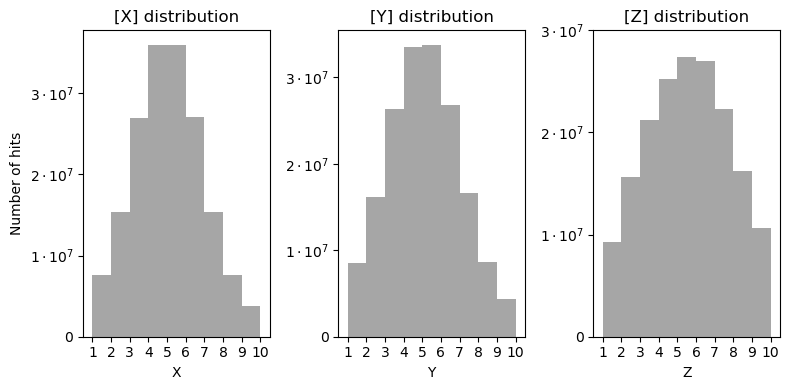

In [6]:
#now the the plots / histograms for x,y,z distribution respectively
plt.figure(figsize=(8, 4)) # Adjust figure size as needed
bin_edges = np.arange(1, 11)

plt.subplot(1, 3, 1) 
plt.title('[X] distribution')
plt.hist(x, bins=bin_edges, color='grey', alpha=0.7)
plt.xlabel('X')
plt.ylabel('Number of hits')
plt.xlim(0.5, 10.5)
plt.xticks(np.arange(1, 11, 1))
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.yticks(np.arange(0, 3 * 10**7 + 1, 10**7), ['0', '$1 \cdot 10^7$', '$2 \cdot 10^7$', '$3 \cdot 10^7$'])


plt.subplot(1, 3, 2)
plt.title('[Y] distribution')
plt.hist(y, bins=bin_edges, color='grey', alpha=0.7)
plt.xlabel('Y')
plt.xlim(0.5, 10.5)
plt.xticks(np.arange(1, 11, 1))
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.yticks(np.arange(0, 3 * 10**7 + 1, 10**7), ['0', '$1 \cdot 10^7$', '$2 \cdot 10^7$', '$3 \cdot 10^7$'])



plt.subplot(1, 3, 3)
plt.title('[Z] distribution')
plt.hist(z, bins=bin_edges, color='grey', alpha=0.7)
plt.xlabel('Z')
plt.xlim(0.5, 10.5)
plt.xticks(np.arange(1, 11, 1))
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.yticks(np.arange(0, 3 * 10**7 + 1, 10**7), ['0', '$1 \cdot 10^7$', '$2 \cdot 10^7$', '$3 \cdot 10^7$'])


plt.tight_layout()
plt.show()

[10.000006]


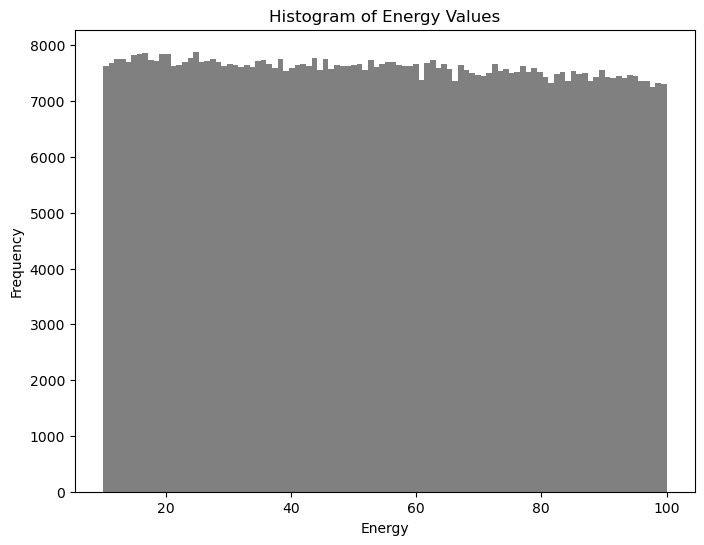

In [7]:
#plotting the total energies values in a  
plt.figure(figsize=(8, 6))
plt.hist(energy_total, bins=100, color='grey')
plt.title('Histogram of Energy Values')
plt.xlabel('Energy')
plt.ylabel('Frequency')

#plt.yticks([0, 1, 10, 100, 1000, 10000,100000], ['$0$', '$10^0$', '$10^1$', '$10^2$', '$10^3$', '$10^4$','$10^5$'])
print(min(energy_total))

plt.show()

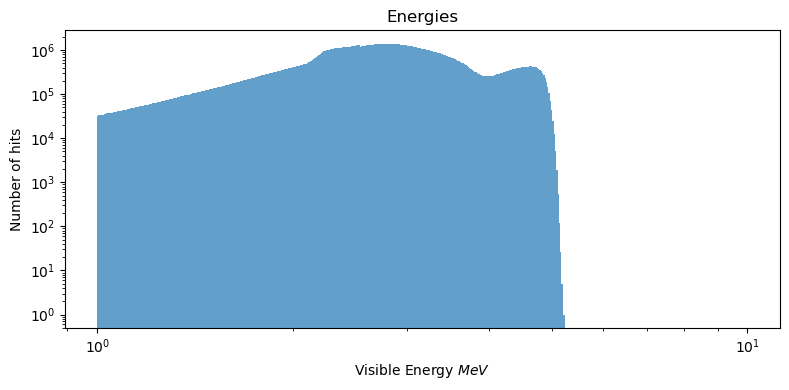

In [8]:
plt.figure(figsize=(8, 4)) # Adjust figure size as needed

#transforming the data for a log_scale
log_energy = np.log10(energy_xyz)
min_value = 1
max_value = 10
num_bins = 500
bins = np.logspace(np.log10(min_value), np.log10(max_value), num_bins + 1)  


plt.title('Energies')
plt.hist(log_energy, bins=bins, alpha=0.7)
plt.xlabel('Visible Energy $MeV$')
plt.ylabel('Number of hits')

#plt.xticks(np.arange(1, 11, 1))
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
#plt.yticks(np.arange(0, 3 * 10**7 + 1, 10**7), ['0', '$1 \cdot 10^7$', '$2 \cdot 10^7$', '$3 \cdot 10^7$'])
plt.xscale('log')
plt.yscale('log')


plt.tight_layout()
plt.show()